Homework 1 — (15 points)
======
### What to hand in
1. A Jupyter notebook containing all code and output (figures and audio). I should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip. 
1. Submit this .zip file via Canvas

## Run this code block 1st, to import likely needed packages

In [1]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

/home/harntson/miniconda2/envs/eecs352/lib/python2.7/site-packages/librosa/core/audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


## Questions

#### 1. (one point) Go out on the web and read about the early history of audio recording. Thomas Edison, Alexandar Graham Bell,  Édouard-Léon Scott de Martinville and Valdemar Poulsen are all big names in the history of audio recording. Give one paragraph on what each of these people contributed to audio recording.

Despite being mostly deaf, Thomas Edison developed the first method of recording and reproducing sound in August 1877, when he completed his model of the first phonograph. Edison spend may years working as a telegrapher, and while he was working to improve the telegraph transmitter he noticed that the tape moving through the machine sounded like a voice. By using a stylus and a tinfoil cylinder, he was able to record and play back his own voice.

Alexander Graham Bell's work centered around experiments in sound, and his most moteable accomplishment was the design and patent of the first practical telephone. While working on a harmonic telegraph, Bell became fascinated with the idea of transmitting the human voice over wires. On March 10, 1876, he made the first telephone call to his partner, Thomas Watson.

Edouard-Leon Scott de Martinville invented the earliest known sound recording device, the phonautograph (Edison's distinction was that the phonograph could also reproduce the recorded sound). A stenographer by trade, he was fascinated by the idea of transcribing vocal sounds with no omissions. He studied drawings of auditory anatomy and sought to mimic the workings of the ear with a mechanical device. On January 26, 1857, he patented the phonautograph, which was able to create visual images of recorded sound.

Valdemar Poulsen was a Danish inventor and engineer who invented the telegraphone, a magnetic recording device that layed the foundation for today's recording industry. He was the first person to sucessfully implement the magnetic recording of sound by using a thin steel wire, which was later replaced by a steel ribon. One advantage of the telegraphone was its ability to record directly from telephone lines.

#### 2. (one point)  The sample rate of telephone audio (8 kHz) and CD quality audio (44.1 kHz) are very different. Explain what effect this difference in sample rate has on the ability of a recorder to reproduce sound and why the sample rate of CD audio is what it is. 

When sampling audio, a higher sampling rate means more quantization levels. More quantization levels means more dynamic range and, thus, better sound. The CD's higher sampling rate means it will be able to reproduce the original sound with much higher quality and accurary than a telephone. 

The sample rate of CD audio is 44.1 kHz because the range of human hearing goes up to 20 kHz. Since humans are the end users of CD audio, it's important to represent all of the frequencies they can hear. So, the sampling rate of CD audio is at the Nyquist frequency, just over twice the frequency of the highest frequency you want to represent (20 kHz).

#### Sample rate isn't the only difference between CD and telephone audio. Express in dB the difference in dynamic range between 8 bit audio (telephone quality) and 16 bit audio (CD quality).  How many bits would one need to exceed the dynamic range of human hearing? Show you work.

Your answer goes here

In [2]:
# your code to give the answer goes here

#### 3. (one point) Make a function to generate sinewaves and a function  to plot an audio signal. Label the figure's axes appropriately.

In [3]:
def make_sinewave(f, t, sr):
    """    
    Parameters
    ----------
    f:  float
        Frequency of sine wave
    t:  float
        Duration in seconds
    sr: int
        Sample rate
    
    Returns
    -------
    wave: np.ndarray 
        Array of floats containing the signal
    """
    dt = np.arange(0,t*sr)/sr
    wave = np.sin(2*np.pi*f*dt)
    return wave


def plot_audio(x, sr, figsize=(16,4)):
    """
    A simple audio plotting function
    
    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """
    length = float(x.shape[0]) / sr
    t = np.linspace(0,length,x.shape[0])
    plt.figure(figsize=figsize)
    plt.plot(t, x)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()

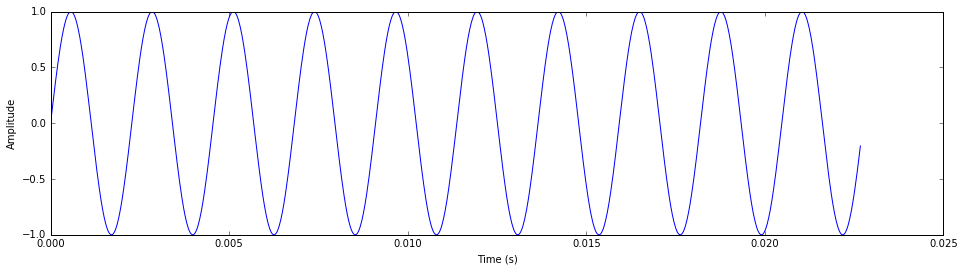

In [4]:
# Now plot a signal
sr = 44100

x = make_sinewave(440., 3., sr)
plot_audio(x[:1000], sr)

#### 4. (one point) What 3 pitch classes are in a C major triad? Make a C major triad out of sine waves that is in the same octave as A440 (i.e. starting on the C above A440). Display the waveform and play it.

The 3 pitch classes in a C major triad are C, E, G

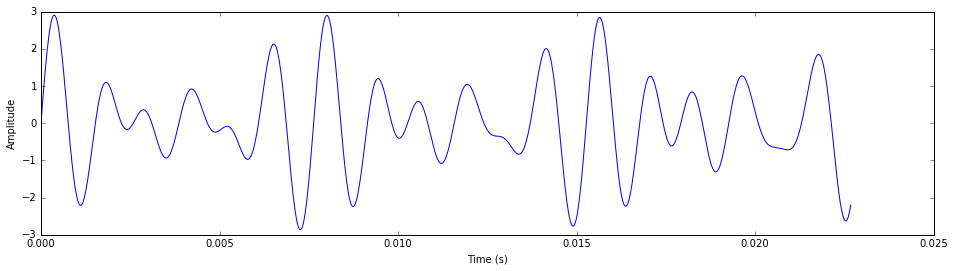

In [5]:
# Make, plot and play the C major triad here.

# Reference frequency A440
f0 = 440.
t = 3.

# Calculate triad frequencies and create waves
f1 = (2.**(3./12))*f0 #C
c = make_sinewave(f1, t, sr)
f2 = 2.**(7./12)*f0 #E
e = make_sinewave(f2, t, sr)
f3 = 2.**(10./12)*f0 #G
g = make_sinewave(f3, t, sr)

# Create wave
triad = c + e + g
plot_audio(triad[:1000], sr)

# Play
Audio(triad, rate=sr)

#### 5. (one point) Implement a simple function to express the Root Mean Squared Amplitude of a signal encoded as an array, in dB, with respect to a reference value.

In [36]:
def rms_db(signal, reference):
    '''
    Parameters
    ----------
    signal:  np.ndarray 
        Array of floats containing the signal
    reference:  float
        A reference amplitude to compare to 

    Returns
    -------
    float
        a value in dB, given the reference value
    '''
    
    # Calculate rms amplitude of input signal
    rms = rms_amp(signal)
    
    # Now calculate decibels with respect to reference
    db = 20 * math.log10(rms/reference)
    return db


def rms_amp(signal):
    '''
    signal: np.ndarray
        Array of floats containing the signal
    
    Returns
    float
        RMS amplitude of signal
    '''
    T = len(signal)
    
    rms = 0.
    for i in signal:
        rms = rms + i**2.
    rms = rms*(1./T)
    rms = math.sqrt(rms)
    return rms


#### 6. (one point) Make a signal.  Vary its volume and find out for yourself how many dB different sounds have to be, before you can tell the volume is different?  Play identical pairs, where the only difference between them is the amplitude. Start with 0 db difference, and grow the difference until you can reliably tell them apart.   Oh...and do this in a quiet room with headphones on. This won't work at all on your laptop speakers or in a loud room.

I played around with the amplitude of sine1 for a while, and the smallest change at which I could reliably detect a difference in volume was at 1.58dB (below)

In [25]:
#write your code to make repeated pairs of audio that vary by differing dB amounts here.

sine0 = make_sinewave(440., 2., sr)
sine1 = 1.2*sine0

# Calculate db difference
rms_0 = rms_amp(sine0)
db = rms_db(sine1, rms_0)

print str(db)+" db Difference"

# Concatenate the two waves
sine2 = np.concatenate((sine0, sine1))

# Play audio
Audio(sine2, rate=sr)

1.58362492095 db Difference


#### 7. (one point) Implement a Fourier transform function and an inverse Fourier transform function using the formulae from the course lecture notes.

In [8]:
def fourier_transform(x):
    """ 
    Performs a Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of real or complex values containing the signal
    
    Returns
    -------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    x_out = np.zeros(np.shape(x), dtype=complex)
    N = len(x)
    
    # For each value x_out[k] in x_out
    for k in range(0,len(x_out)):
        # For each value x[n] in x
        sum = 0j
        for n in range(0,len(x)):
            sum = sum + (complex(x[n]) * cmath.exp( ((-2j*cmath.pi)/N) * k * n))
        x_out[k] = sum
    
    return x_out


In [9]:
def inverse_fourier_transform(X):
    """ 
    Performs an inverse Fourier transform
    
    Parameters
    ----------
    X: np.ndarray 
        Array of  complex values containing the signal
    
    Return
    ------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    x_out = np.zeros(np.shape(X), dtype=complex)
    N = len(X)
    
    # For each value x_out[n] in x_out
    for n in range(0,len(x_out)):
        # For each value X[k] in X
        sum = 0j
        for k in range(0,len(X)):
            sum = sum + (X[k] * cmath.exp( ((2j*cmath.pi)/N) * k * n))
        x_out[n] = (sum / N)
    
    return x_out

#### 8. (one point) Write code to test that these functions work properly. Be sure to explain why you think your test is a good one.

To test my functions, I created a test sinewave at 6000Hz (6000 because it looked like a sine wave but didn't take forever to run). I plotted the original wave, then ran it through a Fourier transformation using fourier_transform(). I then took that output and ran it through an inverse Fourier transformation using inverse_fourier_transform(). When I observed the final data, the two waves were the same (disregarding some negligible imaginary parts). This conclusion can be seen by the two identical graphs.

To further test my functions, I graphed the result of the Fourier transformation.


In [ ]:
# Function to graph a signal in the frequency domain

Original Signal


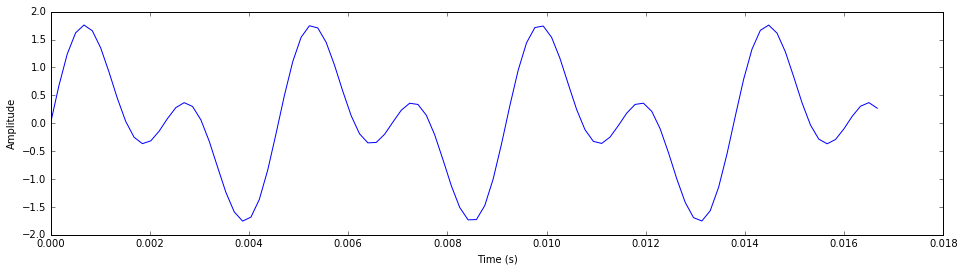

Fourier Transformation to Frequency Domain
Inverse Fourier Transformation back to Time Domain


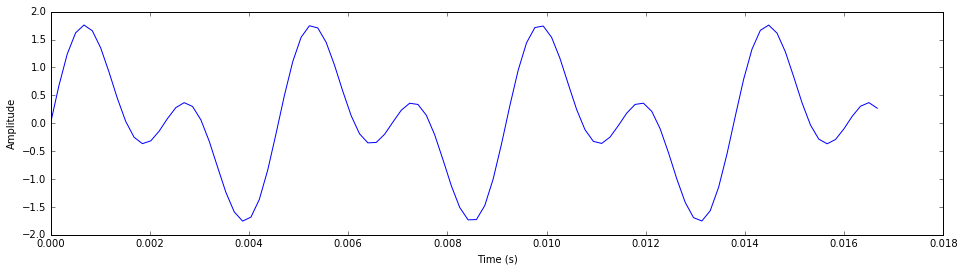

In [12]:
# Write your code to check here. 
#  Be sure to explain in your comments how this test confirms the correctness.
# NOTE: 2 things *I* would test are (1) if I take the Fourier transform of a signal, 
# and then take its output as the input to the inverse Fourier transform, does the 
# result look like the original signal?  and (2) If I look at the result of the 
# Fourier transform, do I see a pattern of energy that I would expect to see, given
# what the input signal contains?

# Create a signal
test1 = make_sinewave(440., 1., 6000)
test2 = make_sinewave(220., 1., 6000)
test = test1 + test2
print "Original Signal"
plot_audio(test[:100], 6000)

# Take Fourier transformation
test_dft = fourier_transform(test)

# Does the plot of the frequency domain signal look correct?
print "Fourier Transformation to Frequency Domain"
#max_f = np.maximum(test_dft) + 100
#t = np.linspace(0,length,x.shape[0])
#plt.figure(figsize=(16,4))
#plt.plot(test_dft)
#plt.ylabel('Frequency')
#plt.xlabel('Sample')
#plt.show()

# Now take inverse Fourier transformation of that
test_idft = inverse_fourier_transform(test_dft)

# Does it match the original?
print "Inverse Fourier Transformation back to Time Domain"
plot_audio(test_idft[:100], 6000)



From this point on, you will use the fft and ifft functions from scipy, as they are much faster than the code you just wrote. See the following link for documentation on them. 
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html


Hint: https://docs.python.org/2/library/timeit.html and https://docs.python.org/2/library/time.html  are useful for the following problem.
            

#### 9. (one point) What is the computational complexity of the Fourier Transform  code you built? What is the computational complexity of the Fast Fourier Transform (FFT)? Illustrate the difference in running time by measuring how long it takes your fourier_transform code on signals of different length and plot the time to completion (vertical axis) as a function of the number of samples (horizontal axis). Compare that on the same graph to how long it took on the same number of samples with the python FFT. Do these time numbers back up the computational complexity?

PS I promise it works it just takes a while to run the whole thing (if the kernel was restarted)

In [26]:
# Write your code to test the timing of the two approaches here.
import time

# Vector of signal lengths in seconds
times = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Time each fft
lengths = []
my_times = []
test_times = []

for t in times:
    sig = make_sinewave(440., t, 5000)
    lengths.append(len(sig))
    # My function
    start = time.time()
    dft_sig = fourier_transform(sig)
    end = time.time()
    my_times.append(end-start)
    # Python function
    start = time.time()
    fft_sig = sp.fftpack.fft(sig)
    end = time.time()
    test_times.append(end-start)
    

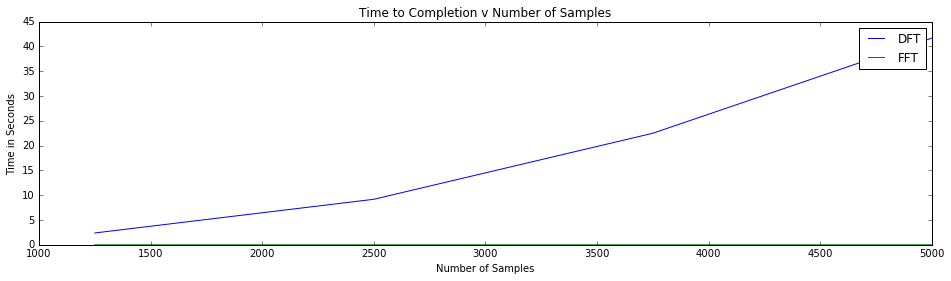

In [27]:
# Code to plot timing data
plt.figure(figsize=(16,4))
plt.plot(lengths, my_times, label="DFT")
plt.plot(lengths, test_times, label="FFT")
plt.legend()
plt.ylabel('Time in Seconds')
plt.xlabel('Number of Samples')
plt.title('Time to Completion v Number of Samples')
plt.show()


#### 10. (one point) The choice of windowing function for your FFT is an important one. Make a sound composed of 2 sine waves at 100 and 250 Hz. The sample rate should be 1000 Hz. Now, take a 64-sample window of the signal and take the FFT of it. Plot the log magnitude spectrum of your signal. Then,  apply a Hann window (from scipy.signal) to the audio before taking another FFT and plot that on the same axis. Compare the two plots. Be sure to label the frequency dimension correctly ( horizontal = frequency in Hz) with the correct units. Be sure to label your two lines so we can tell which is which.

#### Which approach do you think gives a more accurate visualization of the signal contents, the "unwindowed " (i.e. rectangular window) spectrum, or the one windowed with the Hann window?  What is the underlying reason it looks more accurate? 

your answer goes here

In [14]:
#Write your code for plotting the FFT of the harmonic sound here

# Make sinewave
sine0 = make_sinewave(100., 3., 1000)
sine1 = make_sinewave(250., 3., 1000)
sine2 = sine0 + sine1

# Rectangular window of 64 samples
win0 = sine2[:64]
fft0 = sp.fftpack.fft(win0)

# Hann window of 64 samples
win1 = sp.signal.hann(64)
win1 = win1 * win0
fft1 = sp.fftpack.fft(win1)



#### 11. (one point)  Now, do everything exactly like you did in question 10....except increase the number of points in your FFT by taking  a 256 point FFT of this 64-point windowed sample (there is an optional parameter in scipy's fft that lets you specify how many points the FFT has). When you calculate a FFT with more points than are in the signal, zeros are added to the input signal and interpolation is performed on the output signal. In general, zero-padding in the time domain is equivalent to creating new analysis bins in between original bins in the frequency domain. This often gives us a more accurate view of the frequency content in the signal. What do you see that you didn't see before? 

You can read more about the effect of zero-padding on the frequency-domain representation in the follwing pages:

http://www.dsprelated.com/freebooks/sasp/Zero_Padding_Time_Domain.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain



your answer goes here.


In [18]:
# write the code here

# Make sinewave
sine0 = make_sinewave(100., 3., 1000)
sine1 = make_sinewave(250., 3., 1000)
sine2 = sine0 + sine1

# Rectangular window of 64 samples
win0 = ISideWith:sine2[:64]
fft0 = sp.fftpack.fft(win0, n=256)

# Hann window of 64 samples
win1 = sp.signal.hann(64)
win1 = win1 * win0
fft1 = sp.fftpack.fft(win1, n=256)

#### 12. (one point) What is the pitch (in Hz) of the lowest note played by a well-tuned piano using equal temperment tuned at A440? What is the pitch (in Hz) of the highest note? Now, given these numbers, assume you're recording at 44100 Hz (CD quality audio). Give a window length (in samples) so that the spacing between frequency bins (and therefore the frequency of the lowest component you can represent) is low enough to capture the lowest note on the piano. 

your answer goes here

#### 13. (one point) The case of the missing fundamental is where a sound seems to have a pitch at frequency F0, but has no energy at this frequency.  Instead all the frequency is at integer multiples of F0. Build an audio example that illustrates the case of the missing fundamental: First play a harmonic sound with 10 harmonics (including F0).  Let's make it the C one octave below Middle C on the piano: 131 Hz. Then, successively remove each harmonic, starting from the lowest, to the highest (F0, then F1....etc). How many harmonics had to disappear before it sounded like the pitch changed?

I was able to remove three harmonics without a change in pitch. When I removed the fourth harmonic (f3), I was able to detect a shift up in pitch, as shown in the audio output below.

In [35]:
# your code to make the missing fundamental illustration goes here.

# All 10 harmonics
f = 131. #C
t = 2.

f0 = make_sinewave(f, t, sr)
f1 = make_sinewave(2*f, t, sr)
f2 = make_sinewave(3*f, t, sr)
f3 = make_sinewave(4*f, t, sr)
f4 = make_sinewave(5*f, t, sr)
f5 = make_sinewave(6*f, t, sr)
f6 = make_sinewave(7*f, t, sr)
f7 = make_sinewave(8*f, t, sr)
f8 = make_sinewave(9*f, t, sr)
f9 = make_sinewave(10*f, t, sr)

# Harmonic sound
harm = f9 + f8 + f7 + f6 + f5 + f4 + f3
miss = f9 + f8 + f7 + f6 + f5 + f4

out = np.concatenate((harm, miss))

Audio(out, rate=sr)


#### 14. (one point) Masking is where one sine wave makes a softer sine wave of nearby frequency inaudible. In class, you learned that our frequency sensitivity is related to the log of the frequency. This means that a lower tone will mask a broader frequency range above it than it does below it. We're going to explore that in this problem.  Make a sine wave at 1000 Hz.  Now, make a 2nd sine wave that is 30 dB softer and 50 Hz lower. Play them simultaneusly. Can you hear both? Now repeatedly lower the frequency of the softer sine wave by 50 Hz. At what frequency does it become really obvious that there are two sine waves?  Now try it the other direction.  Make the softer tone at 1050 Hz and vary it upward by 50 Hz each time. Now at what frequency does the softer tone become obvious? By the way....do this experiment with decent headphones in a quiet room. Don't use your laptop speakers in a noisy place.

When the softer wave was only 50 Hz lower, I could not hear both. I was able to hear both waves when the softer wave was at 850 Hz. The other direction took longer; I wasn't able to hear both waves until the softer wave was at 1300 Hz.


In [63]:
# your code to illustrate masking goes here

# Loud tone
ref = make_sinewave(1000., 3., sr)

# Softer tone, calculated using d = 20*log10(A/A_ref)
db = -30
A_ref = rms_amp(ref)
A = (10**(db/20))*A_ref

soft = make_sinewave(1300., 3., sr)
soft = (A/A_ref)*soft

# Play signal
out = ref + soft
Audio(out, rate=sr)


#### 15. (one point) Explain, in your own words, what the cochlea does and how it does it.

As a sound wave travels into the ear, the cochlea separates the complex sound into sine waves--a process that we seek to replicate through Fourier analysis. Inside the cochlea, the sound wave travels along a surface called the Basilar Membrane. The Basilar Membrane gets steadily thinner and less stiff as you travel deeper into the cochlea. Therefore, every point along it has a particular resonance frequency. If the sound wave contains a sine wave at that point's resonance frequency, the Basilar Membrane will begin to oscillate, pulling on tiny hair fibers that fire off neurons to tell the brain what the wave sounds like.